## Honda Smart Colombus Project

---

**Table of Contents**

1.   Datasets
2.   Exploratory Data Analysis
3.   Baseline Model
4.   Prototype
5.   Performance Evaluation
6.   System Architecture Overview
7.   The Code
8.   Key Findings
9.   Bottlenecks & Challenges




## 1.   Datasets


DATASETS USED
1. We were given multiple datasets by Honda, which include data about trip logs. For our model we are using some data about the trips such as the car's speed, acceleration, latitude and longitude, brake status and others. The data was provided to us as excel files and was mostly clean, however, some values (such as time) had to be modified to a different format for our usage. 


2. In addition to the data we recieved from Brian Nutwell, we also gathered data from the [map of parking meters in Colombus](https://columbus.maps.arcgis.com/apps/webappviewer/index.html?id=a3d143ffbb574aa89851ffa011c1fe67). From the HTML data, we used the id to trace to  [here](https://maps2.columbus.gov/arcgis/rest/services/Schemas/PublicService/MapServer/1) and we extracted [this](https://maps2.columbus.gov/arcgis/rest/services/Schemas/PublicService/MapServer/1/query?where=1%3D1&text=&objectIds=&time=&geometry=&geometryType=esriGeometryPoint&inSR=3735&spatialRel=esriSpatialRelIntersects&relationParam=&outFields=*&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=4326&having=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&queryByDistance=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&f=pjson) data, which contained all the data of parking meters in Colombus.

3. In addition, we downloaded data from www.smartcolumbusos.com/, where data includes information about parking meters specifically in Columbus, OH in the years 2015-2017. 


## 2.   Research / Exploratory Data Analysis

Current Examples:
*	Google Maps has implemented a find parking option on Android phones, where users can tap a “find parking” option that will pull up a list of nearby parking lots and garages and direct users to their chosen lot, with walking directions to their final destination.
*	BMW is working with ParkMobile to use their crowdsourced data for cities to alert users to available parking spots. Using large datasets provided ParkMobile, their solution is being developed to allow BMW’s autonomous vehicle fleet to, as ParkMobile’s CEO puts it, “be able to get into their car knowing exactly where their car will come to rest at the end of their journey.”


Young, W., Thompson, R. G., & Taylor, M. A. P. (1991). A review of urban car parking models. Transport Reviews, 11(1), 63–84. https://doi.org/10.1080/01441649108716773
*	Young et. al. analyzed various methods of governmental strategic planning initiatives for how cities manage their car parking inventory.
* However, they found that even though parking facilities have a large impact on a city’s traffic flow and transport systems, political decisions about these facilities are made on an ad hoc basis and don’t consider a holistic view of the network. 
* They note that current technological solutions for parking management focus on choice, allocation and interaction models. 

Topp, H. H. (1993). Parking policies to reduce car traffic in German cities. Transport Reviews, 13(1), 83–95. https://doi.org/10.1080/01441649308716836
*	Topp’s 1993 research found that Parking guidance systems are doubtlessly useful at reducing the amount of car traffic generated by a search traffic.
* He notes that parking spaces generate traffic based on how long they’re full, what time of day they are used, how often cars park and leave there and how long people spend searching for parking.
*	Topp notes search traffic is often of 50-70% of the total car traffic in a city center and that a parking guidance system should “inform about specific parking garages instead of 'free spaces straight on', because people familiar with a city follow a display only if they know to which parking garage they are being directed.”



Bonsall, P., & Palmer, I. (2004). Modelling drivers’ car parking behaviour using data from a travel choice simulator. Transportation Research Part C: Emerging Technologies, 12(5), 321–347. https://doi.org/10.1016/j.trc.2004.07.013

*	Bonsall and Palmer developed a parking choice simulator, which allowed them to observe how drivers’ searched for parking and what types of decisions they made to look for parking in urban areas.
*	They found that price, walking time, driving distance, knowledge of the area and search time were important variables in how someone went about searching for parking.
*	They found that a majority of drivers on their first (unfamiliar) journey to an area, preferred to head for an area where they knew there would be a car park, like a rail station, and those who had head to their location first, tended to change their behavior as the trail went on. 

Polak, John & Axhausen, Kay. (1994). MEASURING THE EFFECTIVENESS OF PARKING GUIDANCE SYSTEMS: A CASE STUDY OF FRANKFURT/MAIN. TSU REF. 8 p..
*	Parking Guidance Systems decreased search times during periods of high demand, such as Saturdays and lead to complex shifts in parking search behavior.
*	System buy-in will lead to better benefits for the people of the city.
*	Factors affecting the use of the system have been found to include: how information is disseminated; journey characteristics; parking preferences; and the level of familiarity and local knowledge of the driver population.

Boesefeldt, J and Kunze, W. 1982. ERFAHRUNGEN MIT DER PLANUNG UND DEM EINSATZ VON PARKLEITSYSTEMEN. Transportation Research Board of Germany. Straßenverkehrstechnik. Volume 26. Issue 4. Pages  99-109.
*	In Aachen, Germany, where the first parking guidance system in Germany was installed in the early seventies, less than half of the drivers who are familiar with the city follow the system.
*	Average search traffic in Aachen dropped from about 25% to about 21% of the total car traffic, but the system is used more often at peak times.







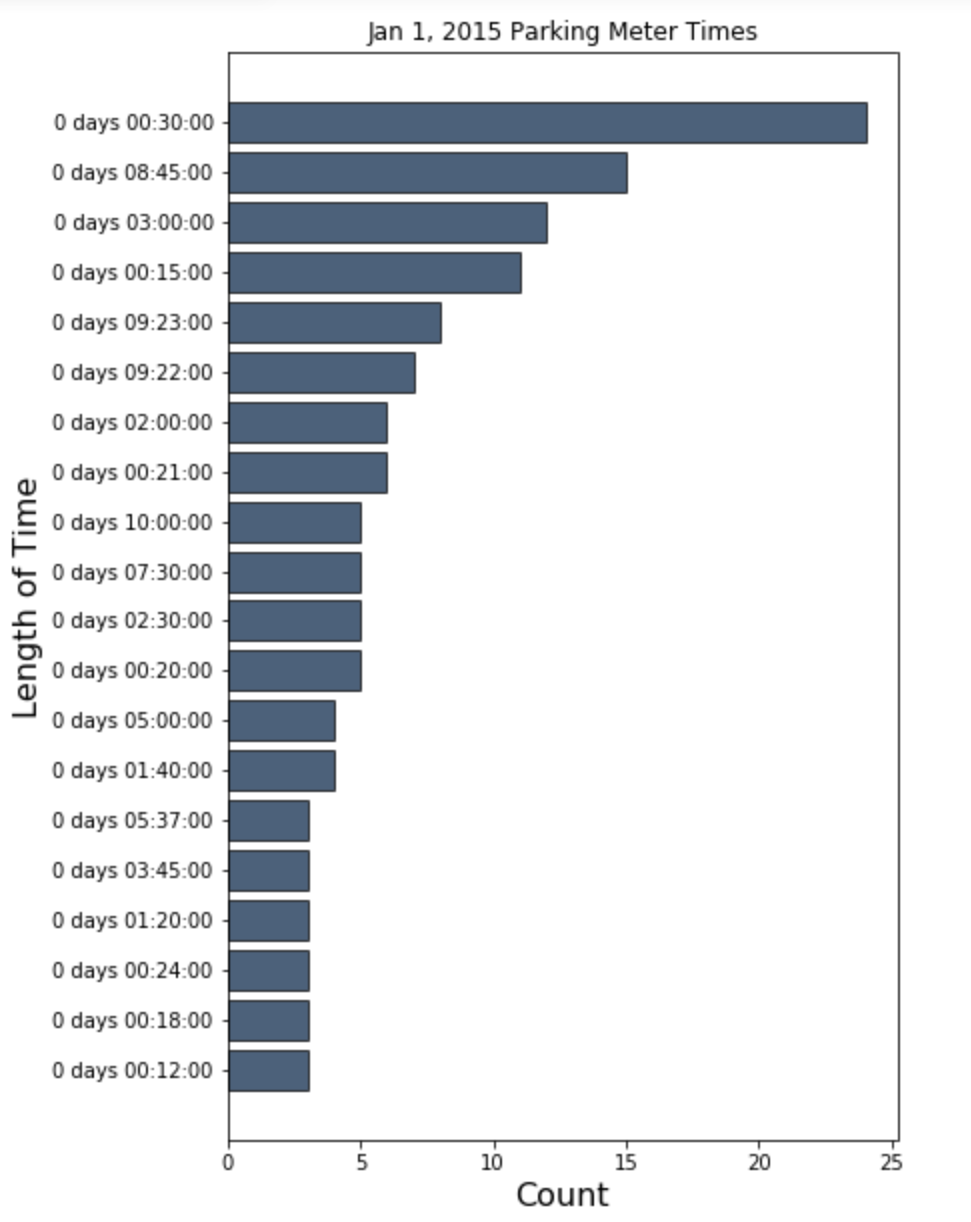

In [0]:
from IPython.display import Image
Image(filename="56679486_1757559091011969_4866411762724896768_n.png")

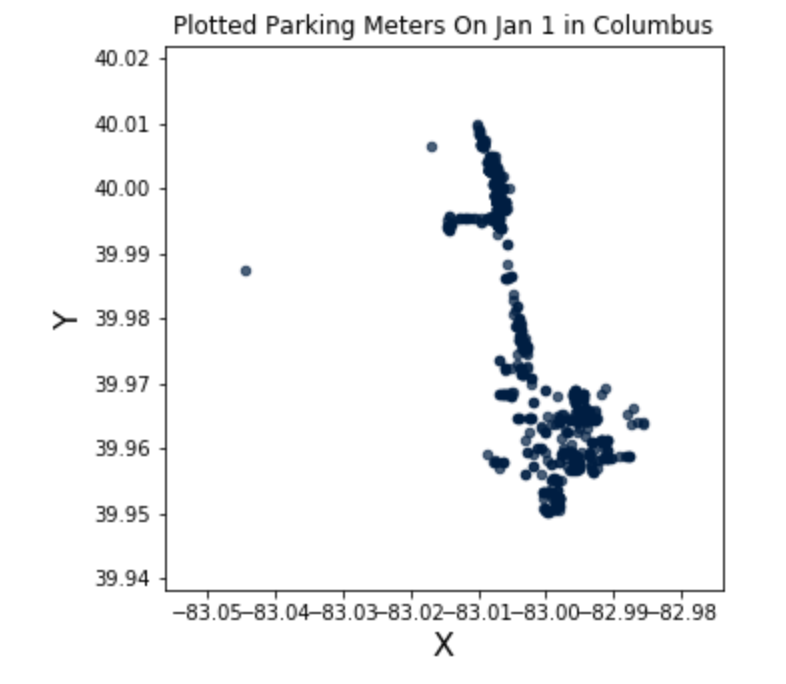

In [0]:
Image(filename="56990365_290626325164638_919833633747894272_n.png")

## 3.   Baseline Model

The model is a time series classification model that separates the data into intervals acting the same way vectors would in a simple classification model. The model tentatively trains on the coordinates, velocity, acceleration, brake status, turn signal and lamp usage. Then, we will test the intervals at different lengths to see which time interval length returns an optimized accuracy.
The main library being used for the model is [tsfresh]([https://tsfresh.readthedocs.io/en/latest/) which will be trained on data separated into 3 minute intervals of data. The last interval  will classify the car as looking for parking and parking is available in the area since that car was able to find one. All the intervals before that one where the car is within walking distance (5 blocks and under 25 mph) will be labeled as looking for parking and parking is unavailable. All other data will be classified as cars not looking for parking and will not affect the results of available parking in an area. 
The model will use k-cross validation to minimize underfitting and overfitting measured by a simple classification loss function.

## 4.   Prototype


For our MVP, we are showcasing several parts: the user is able to input the current time and their desired destination into a form, our backend parses the destination into latitude and longitude, determines the best nearby parking spot through our model, and displays it and a route nicely to the user using the Google Maps API. This is interactive, but is limited to only destinations in the city of Columbus ('Smart Columbus', as termed in their partnership with Honda). 

Currently, we have the backend, which takes in a destination as the input and provides a route to the ‘best’ parking spot as the output. We are currently working on hosting our web app on Google App Engine, connecting our backend to an usable front end. Our front end is being built on Google Maps API, and is utilizing Maps, Places, and Routes. 


Although in this submission on 4/11, we do not have a frontend - backend system working properly on Google Cloud App Engine, note that our submission on 4/14 will have an interactive UI (with backend and frontend connected). (See comments for note on pseudo-extension that was granted because of a family emergency of one of our team members.)


## 5.   Performance Evaluation

 Our main key performance indicators are expected miles saved and time saved currently.

The data is tested by the following:

The data from the last X minutes is categorized as available parking

The data where the car is within a Y miles (Arbitrary walking distance) of the destination and going under a Z mph is "Looking for parking but did not find"

The rest of the data is not looking for parking.

We have decided to compare the results given by our model with the data from the actual trips (i.e. the time it took to find a parking spot vs. the time of drive to a suggested parking spot). In other words, if I took a trip to the grocery store at X address on 4/6/19 and took ten min utes to find a parking spot at another Y address, we would query our model to see what parking spot would be suggested for / nearby grocery store (X address); this suggested parking with Z address and T time would be compared to Y address and the ten minutes that it took without our system.

## 6.   System Architecture Overview




 A user will tap a "Find Parking" button on their chosen screen. We plan to implement a front-end with the ultimate hope is that this could be implemented on the Honda cars.
 
 UX: 
* 1) A User will input a destination on their GPS on their Honda car. 
* 2) The User can select a button/option allowing them to look for available parking.
* 3) The User will be presented with available parking options plotted on a map nearby their destination. This will include information like price and availability.
* 4) The User will select their preferred parking option.
* 5) The User will be directed to that parking location by the car's GPS.
* 6) Upon arrival, the User will be given walking directions to their final destination.
* 7) For feedback purposes, the User will be asked how their experience was and confirm that the parking spot was available.
 

## Bottlenecks & Challenges




One of the issues we've ran into is that there is no true way to test our model without actually driving and using live data. So we've decided to split our data into train and validation datasets, and test on the validation dataset, where each record would have a suggestion of a parking spot. We would compare the results given by our model with the data from the actual trips (i.e. the time it took to find a parking spot vs. the time of drive to a suggested parking spot).

## Acknowledgements